In [3]:
import pandas as pd
df = pd.read_csv(r'\Users\User\Desktop\INTERSHIP WORK\ifood_df.csv')



# Quick glance at structure
print(df.info())
print(df.isnull().sum())  # check for nulls
print(df.describe())      # get summary stats




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
features = [
    'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmpOverall', 'Complain', 'Response',
    'Age', 'Customer_Days',
    'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
    'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'
]

X = df[features]


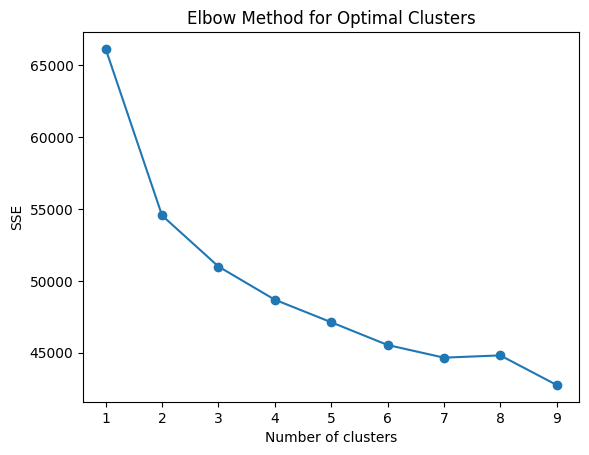

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
sse = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    sse.append(model.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)


               Income     MntTotal  AcceptedCmpOverall    Recency  \
Segment                                                             
0        75893.251786  1309.544643            0.732143  49.376786   
1        35212.395683    86.124358            0.086331  49.461459   
2        58201.131068   680.530744            0.258900  48.012945   
3        20306.259259    58.962963            0.111111  48.444444   

         NumWebPurchases  
Segment                   
0               5.217857  
1               2.162384  
2               6.333333  
3               1.888889  


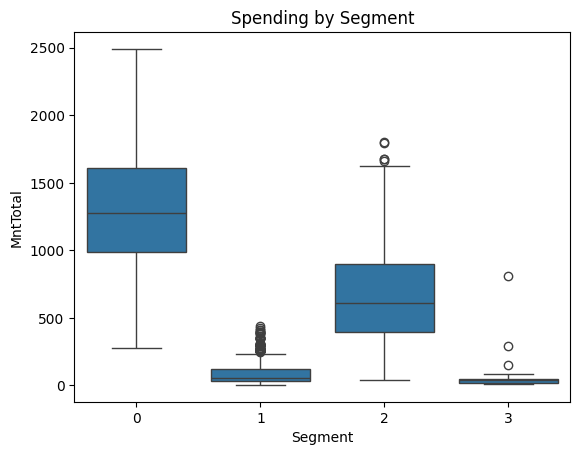

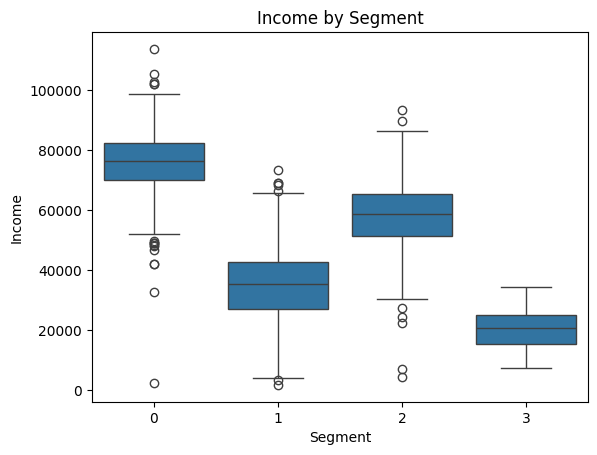

In [8]:
import seaborn as sns

# Cluster-wise summary
cluster_summary = df.groupby('Segment')[['Income', 'MntTotal', 'AcceptedCmpOverall', 'Recency', 'NumWebPurchases']].mean()
print(cluster_summary)

# Visuals
sns.boxplot(data=df, x='Segment', y='MntTotal')
plt.title('Spending by Segment')
plt.show()

sns.boxplot(data=df, x='Segment', y='Income')
plt.title('Income by Segment')
plt.show()
